<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Taller 1 - Histogramas</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg/598px-Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg.png" alt="Escudo UNAL" style="width:200px;height:250px;">

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Técnicas de Inteligencia Artificial - Visión de Máquina</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Marzo de 2023</p>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

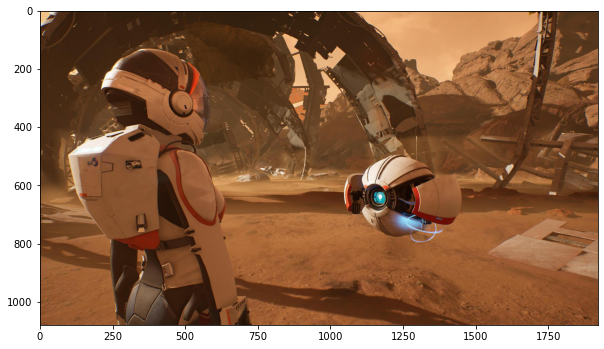

In [2]:
img = cv2.imread("figs/dum.jpeg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show() # Removes additional info displayed

## Histogram

<p style="font-size:16px">There are two functions that can be used to calculate an image's histogram:
<ul>    
<li> <a href="https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html" style="font-size:16px">cv2.calcHist</a>
<li> <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html" style="font-size:16px">matplotlib.pyplot.hist</a></ul></p>

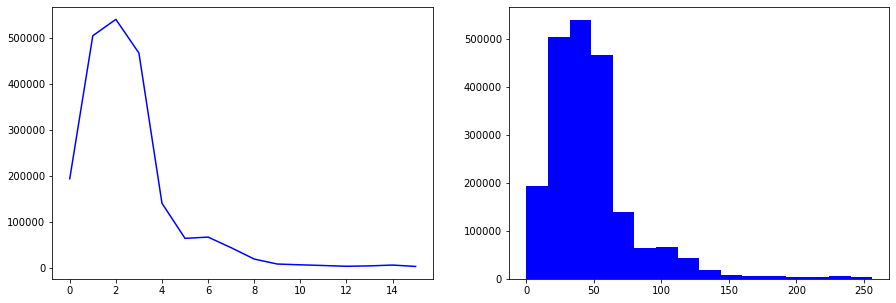

In [5]:
bins = 16

hist = cv2.calcHist([img], [2], None, [bins], [0,256])
"""
cv2.calcHist - Keyword args:
-- image -> image to get the histogram from - [image]
-- channel -> array. Image channels you want to plot the histogram from - [1]
-- mask -> array. Determines which regions of the image will be masked - None
-- bins -> integer. Number of bins - [32]
-- range of intensity values -> array. [0, 2^color_depth] - [0,256]
"""

r, g, b = cv2.split(img)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.plot(hist, color='blue')
plt.subplot(122), plt.hist(b.ravel(), bins, [0,256], color='blue')
"""
plt.hist - Keyword args:
-- image -> 1D array. image to get the histogram from. Use .ravel() to make it 1D
-- bins -> integer. Number of bins - 32
-- cumulative -> bool. Plots cumulative histogram - True
-- density -> bool. Normalizes histogram - True
"""
plt.show()

## Histogram equalization

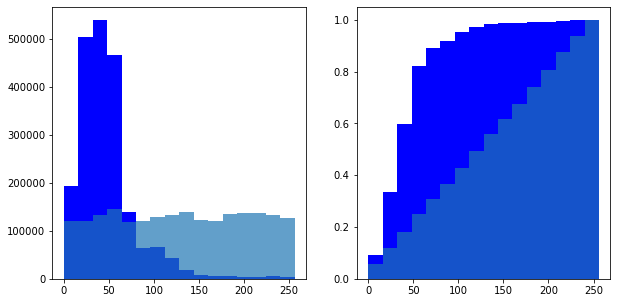

In [9]:
eq_b = cv2.equalizeHist(b)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(b.ravel(), bins, [0,256], color='blue')
plt.hist(eq_b.ravel(), bins, [0,256], alpha=0.7)
plt.subplot(122)
cum = plt.hist(b.ravel(), bins, [0,256], cumulative=1, density=1, color='blue')
cum_norm = plt.hist(eq_b.ravel(), bins, [0,256], cumulative=1, density=1, alpha=0.7)
plt.show()

## CLAHE - Contrast Limited Adaptive Histogram Equalization

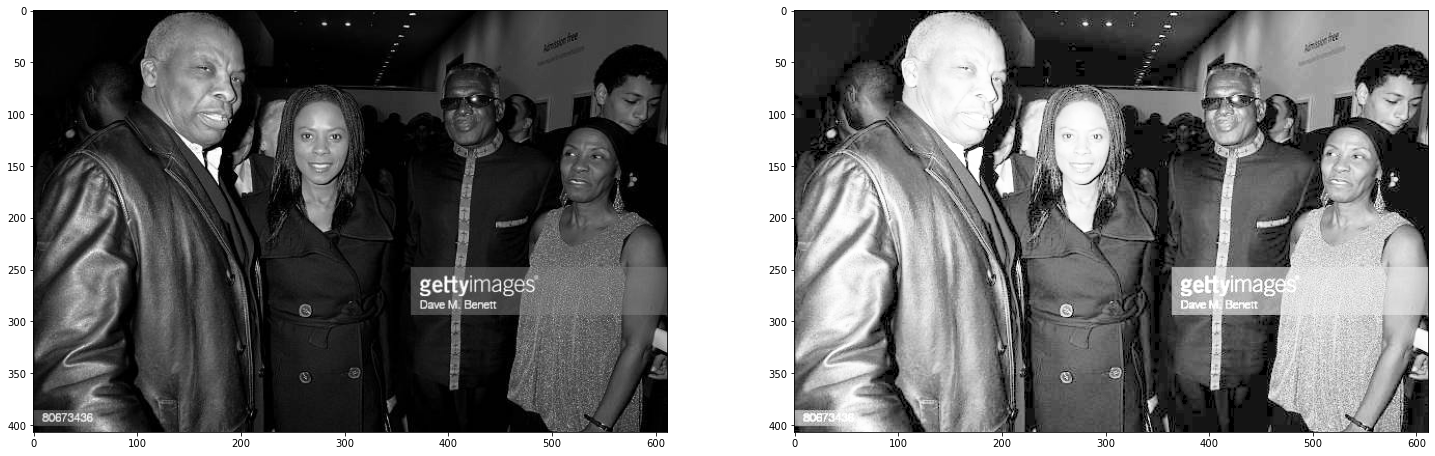

In [31]:
img = cv2.imread("figs/fam.jpg", 0)
eq_img = cv2.equalizeHist(img)

plt.figure(figsize=(25,20))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')
plt.show()

<p style="font-size:16px">Note that histogram equalization now improves the lighting condition for elements such as the second floor and the lights above it. However, the faces of the people closer to the camera are now so bright that feature extraction became a problem.<br><br>
By applying CLAHE, the image is divided in blocks of 8x8, and histogram equalization is applied to each one of them independently. To avoid sudden changes of intensity, interpolation is applied to neighbor pixels. Neighbor pixels are those that define the borders of each block.<br><br>
Go ahead an modify the values for the parameters clipLimit and tileGridSize, and see what changes in the resulting image.
</p>

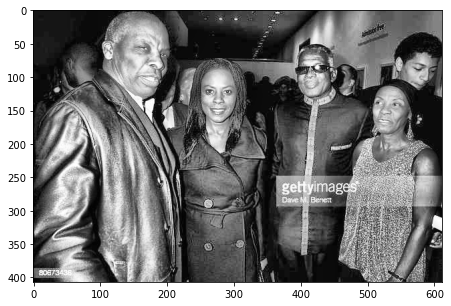

In [9]:
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # Create CLAHE object
cl_img = clahe.apply(img)

plt.figure(figsize=(10,5))
plt.imshow(cl_img, cmap='gray')
plt.show()

## Histogram Comparison

<p style="font-size:16px">To compare histograms we use the function <i>cv2.compareHist</i>.</p>

In [3]:
img = cv2.imread("figs/retina.jpg", 0)
eq_img = cv2.equalizeHist(img)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
eq_hist = cv2.calcHist([eq_img], [0], None, [256], [0,256])

metric_corr = cv2.compareHist(hist, eq_hist, 2)
"""
cv2.compareHist - Keyword Args:
-- histogram1 -> array. 
-- histogram2 -> array.
-- comparison metric -> integer.
    - 0 Correlation
    - 1 Chi-square
    - 2 Intersection
    - 3 Bhattacharyya
"""
print(f"Correlation (original vs. equalized): {metric_corr}")

Correlation (original vs. equalized): 76127.0


<p style="font-size:16px">Besides the aforementioned metrics, there is another interesting distance metric called EMD (Earth Mover's Distance). More info <a href="https://www.youtube.com/watch?v=Bk84wAkunpo&ab_channel=KrishnaswamyLab">here</a> (1:35 - 2:26)

## Image Thresholding

<p style="font-size:16px">The threshold types supported by <i>cv2.threshold</i> can be found <a href="https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576" style="font-size:16px">here</a>.</p>

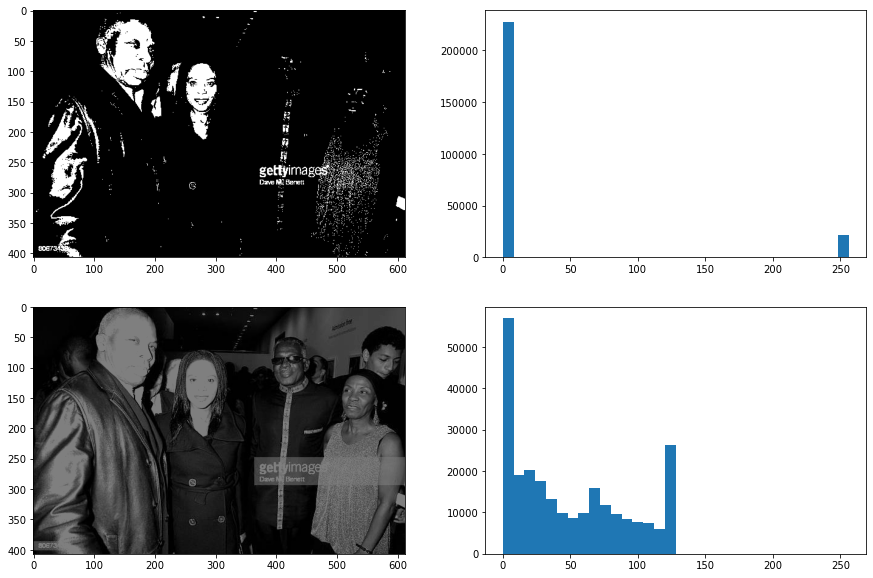

In [17]:
ret, th_b = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, th_tr = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

imgs = [th_b, th_tr]

plt.figure(figsize=(15,10))
for i, image in enumerate(imgs):
    plt.subplot(2,2,2*i+1), plt.imshow(image, cmap='gray', vmax=255)
    plt.subplot(2,2,2*i+2), plt.hist(image.ravel(), 32, [0,256])